In [ ]:
from google.colab import drive
drive.mount ('/content/drive/')

In [465]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [466]:
dataset = '/content/drive/MyDrive/Colab Notebooks/Healthcare/heart.csv'
missing_cells = [np.nan, 'N/A', '-', 'n/a', 'na', 'NA']
heart_condition = pd.read_csv(dataset, na_values=missing_cells)
heart_condition.head(15)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [467]:
heart_condition.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [468]:
heart_condition['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [469]:
heart_condition['Sex'].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [470]:
heart_condition['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [471]:
heart_condition['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [472]:
heart_condition['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [473]:
heart_condition['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [474]:
heart_condition['Sex'].replace(['M', 'F'], [0, 1], inplace=True)
heart_condition['ChestPainType'].replace(['ASY', 'NAP', 'ATA', 'TA'], [0, 1, 2, 3], inplace=True)
heart_condition['RestingECG'].replace(['Normal', 'LVH', 'ST'], [0, 1, 2], inplace=True)
heart_condition['ExerciseAngina'].replace(['N', 'Y'], [0, 1], inplace=True)
heart_condition['ST_Slope'].replace(['Flat', 'Up', 'Down'], [0, 1, 2], inplace=True)

In [475]:
heart_condition.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.210240,0.748366,132.396514,198.799564,0.233115,0.592593,136.809368,0.404139,0.887364,0.567538,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.793670,25.460334,0.490992,1.066570,0.618959,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,0.000000,1.000000
75%,60.000000,0.000000,1.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [476]:
correlation = heart_condition.corr()
correlation

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,-0.055750,-0.165896,0.254399,-0.095282,0.198039,0.210498,-0.382045,0.215793,0.258612,-0.093424,0.282039
Sex,-0.055750,1.000000,0.168254,-0.005133,0.200092,-0.120076,-0.038320,0.189186,-0.190664,-0.105734,0.066831,-0.305445
ChestPainType,-0.165896,0.168254,1.000000,-0.022168,0.136139,-0.116703,-0.065099,0.343654,-0.416625,-0.245027,0.202675,-0.471354
RestingBP,0.254399,-0.005133,-0.022168,1.000000,0.100893,0.070193,0.117206,-0.112135,0.155101,0.164803,-0.083418,0.107589
Cholesterol,-0.095282,0.200092,0.136139,0.100893,1.000000,-0.260974,-0.042595,0.235792,-0.034166,0.050148,0.007110,-0.232741
FastingBS,0.198039,-0.120076,-0.116703,0.070193,-0.260974,1.000000,0.120774,-0.131438,0.060451,0.052698,-0.043534,0.267291
RestingECG,0.210498,-0.038320,-0.065099,0.117206,-0.042595,0.120774,1.000000,-0.093379,0.098360,0.099935,-0.019403,0.107628
MaxHR,-0.382045,0.189186,0.343654,-0.112135,0.235792,-0.131438,-0.093379,1.000000,-0.370425,-0.160691,0.246927,-0.400421
ExerciseAngina,0.215793,-0.190664,-0.416625,0.155101,-0.034166,0.060451,0.098360,-0.370425,1.000000,0.408752,-0.253181,0.494282
Oldpeak,0.258612,-0.105734,-0.245027,0.164803,0.050148,0.052698,0.099935,-0.160691,0.408752,1.000000,-0.097323,0.403951


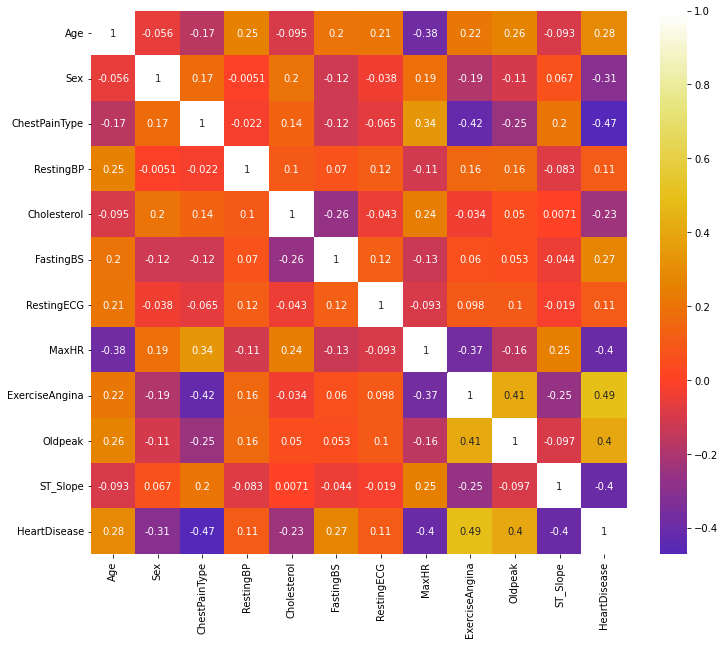

In [477]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='CMRmap', center=0)
plt.show()

In [478]:
X = heart_condition.drop(['HeartDisease', 'Oldpeak'], axis=1)
y = heart_condition['HeartDisease']

In [479]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=21)

In [480]:
rf = RandomForestClassifier(n_estimators=350, random_state=12)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=350, random_state=12)

In [481]:
prediction = rf.predict(X_val)

In [482]:
accu = metrics.accuracy_score(y_val, prediction)
accu

0.9021739130434783

In [483]:
con_mat = metrics.confusion_matrix(y_val, prediction)
con_mat

array([[ 93,  15],
       [ 12, 156]])